In [1]:
from exploratory_data_analysis_utils import compute_frequencies, plot_3d_histogram, plot_heatmap, plot_expected_commitment_given_load, compute_expected_commitment_given_load, plot_gen_commitment_heatmap 
from src.datasets.simple_dataset import SimpleDataset
import pandas

In [2]:
data_dir = "../data/Train_Data"
dataset = SimpleDataset(data_dir)

In [3]:
dataset[0]["gen_names"]

['gen_12c8d461',
 'gen_16b60ab4',
 'gen_179e9575',
 'gen_1eccc250',
 'gen_1fe20d30',
 'gen_204e519c',
 'gen_2155148b',
 'gen_2be55207',
 'gen_3223a28b',
 'gen_34b72ad1',
 'gen_3760182f',
 'gen_3ee144ad',
 'gen_3f6e6ecf',
 'gen_4e0ff615',
 'gen_528be175',
 'gen_5f4016ca',
 'gen_66a1dbb4',
 'gen_6917cd57',
 'gen_707f73ce',
 'gen_7402b65f',
 'gen_7aeb2c57',
 'gen_7fb5012b',
 'gen_809ce5b4',
 'gen_82daac85',
 'gen_8a0dcb92',
 'gen_916ef705',
 'gen_9b33322b',
 'gen_a06f1505',
 'gen_a21ecc31',
 'gen_a42b5872',
 'gen_a7876643',
 'gen_ab163f99',
 'gen_b42fba47',
 'gen_b4eba0b8',
 'gen_b6dbf4f8',
 'gen_b972a1dc',
 'gen_bc3de19e',
 'gen_bec834ae',
 'gen_c88f45e6',
 'gen_d520e1ee',
 'gen_d5aea532',
 'gen_d84b2d57',
 'gen_e2a0735e',
 'gen_e527ad06',
 'gen_ea4d2032',
 'gen_f0ebb407',
 'gen_f3e5828f',
 'gen_f573906b',
 'gen_f8b856d4',
 'gen_fde258d2',
 'gen_ff58fdf4']

In [4]:
frequencies = compute_frequencies(dataset, save_path="commitment_frequncies.pkl")

Loaded commitment frequencies from commitment_frequncies.pkl


/Users/anarivera/Documents/Projects/ai-ccelerating-uc-agent/notebooks/exploratory_data_analysis_utils.py:103: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


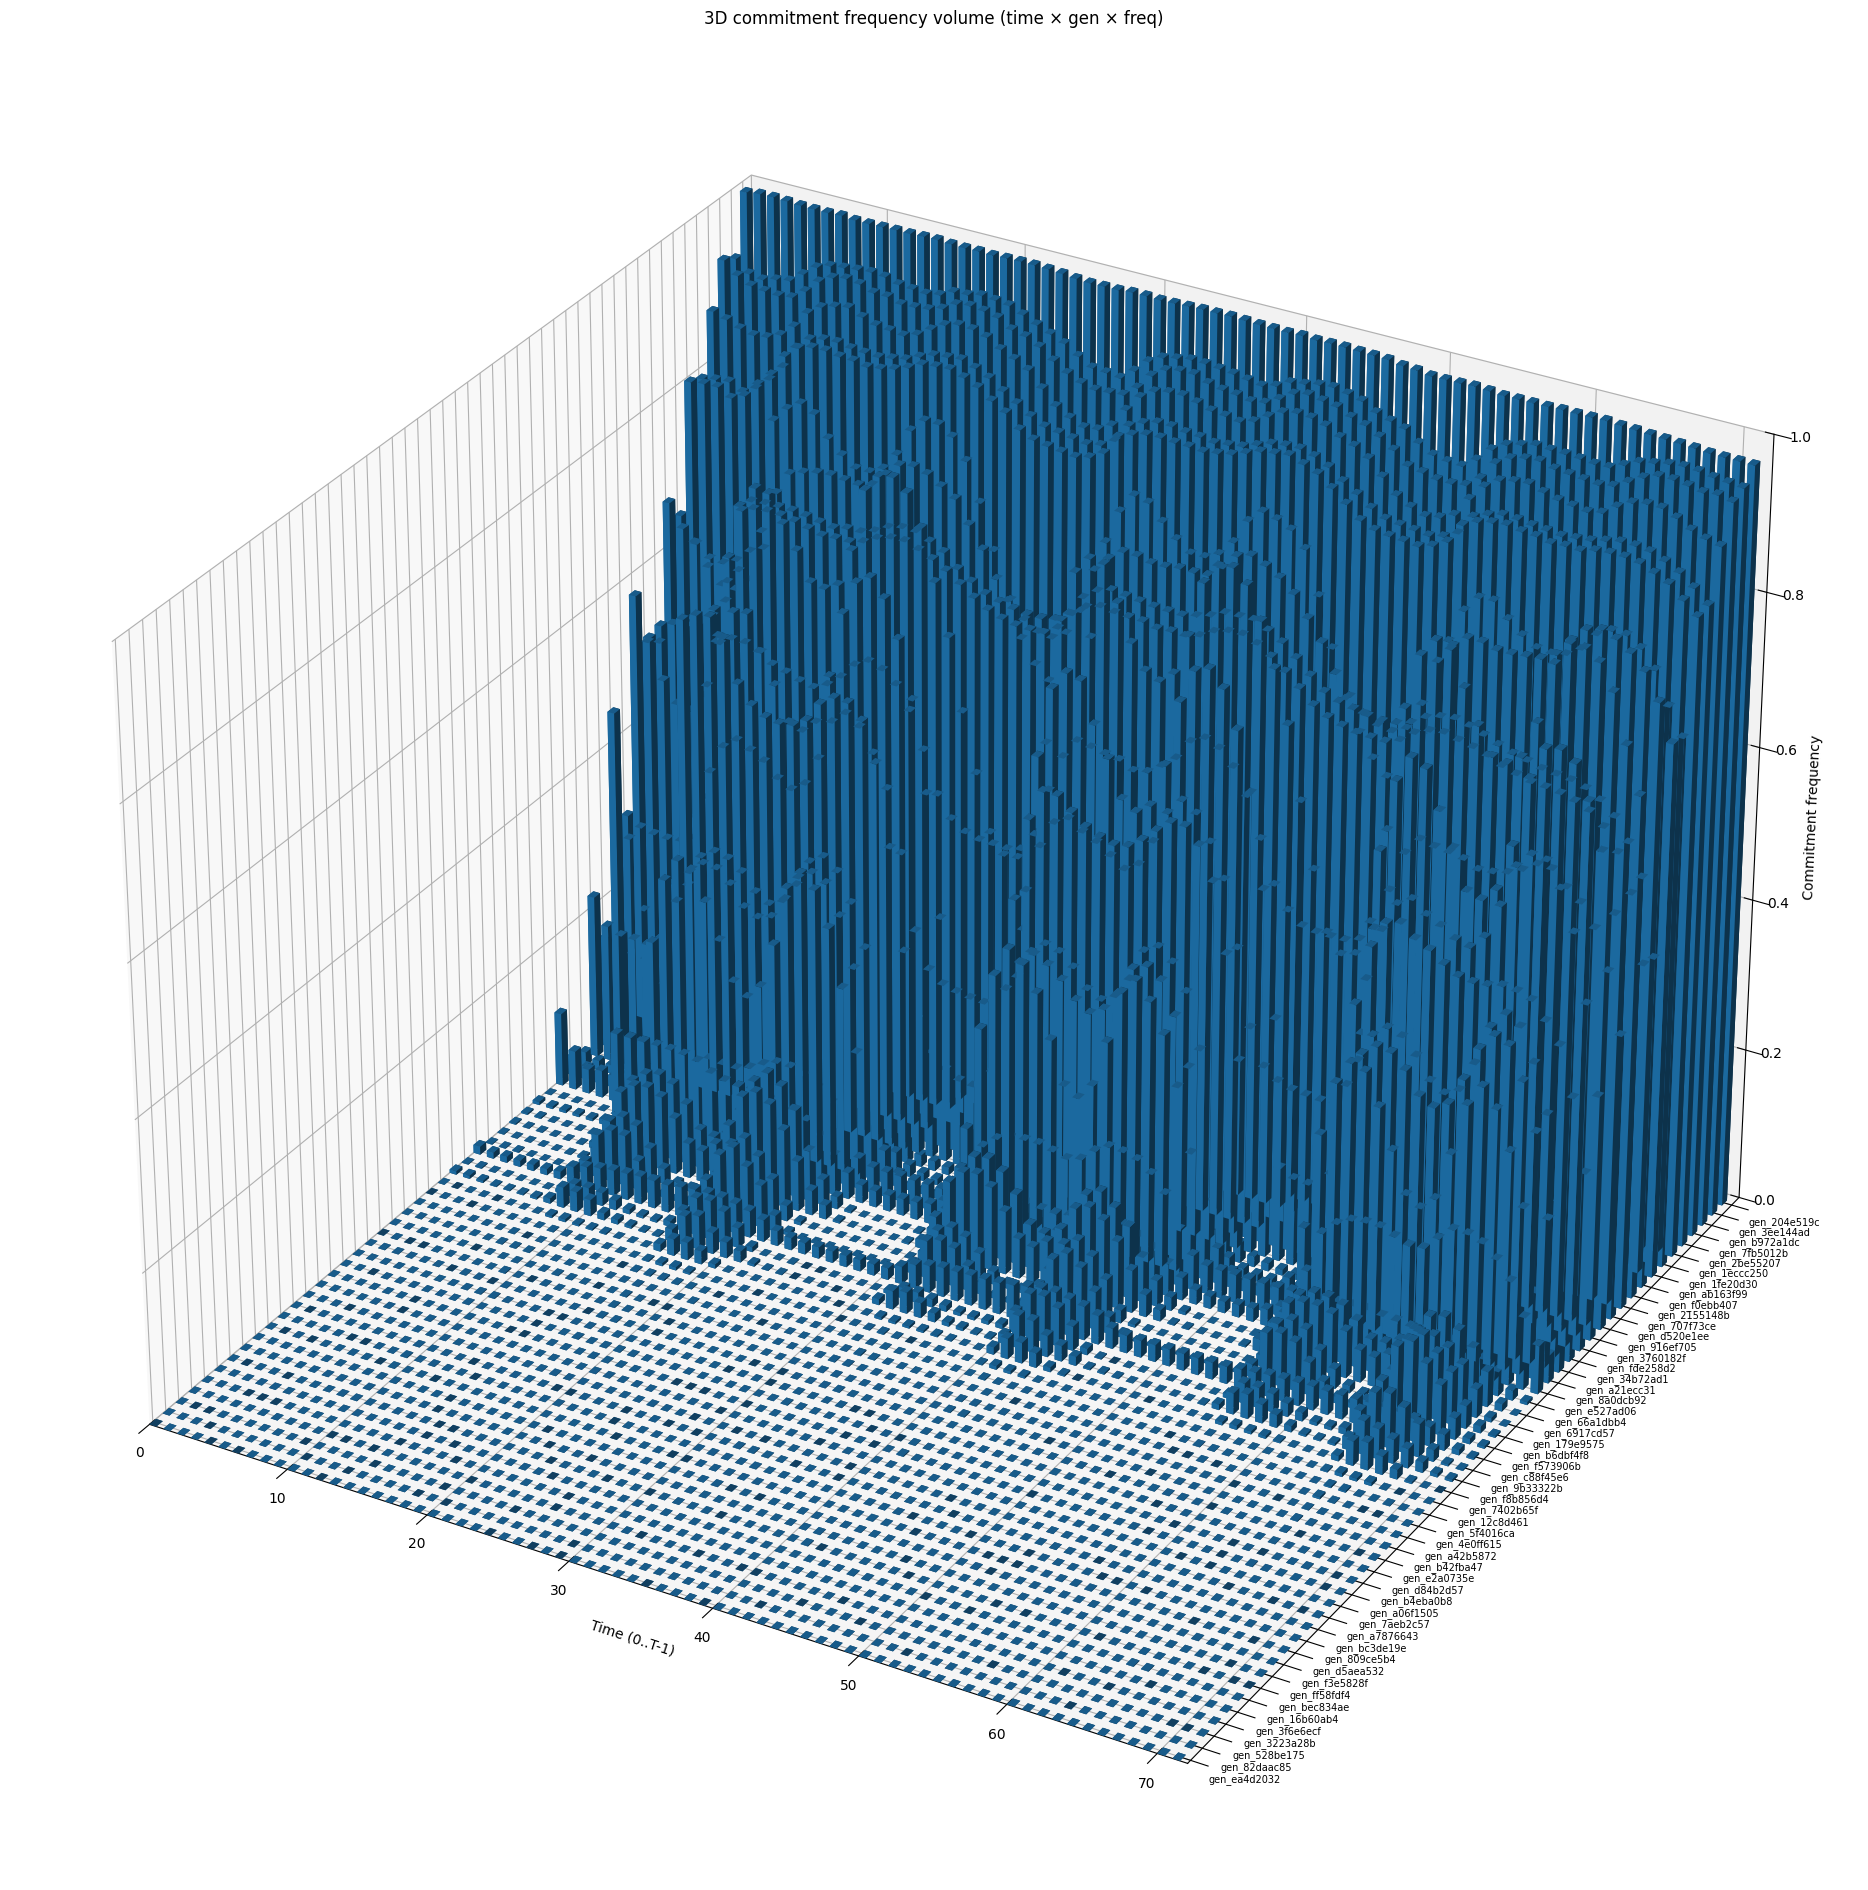

In [5]:
plot_3d_histogram(frequencies)

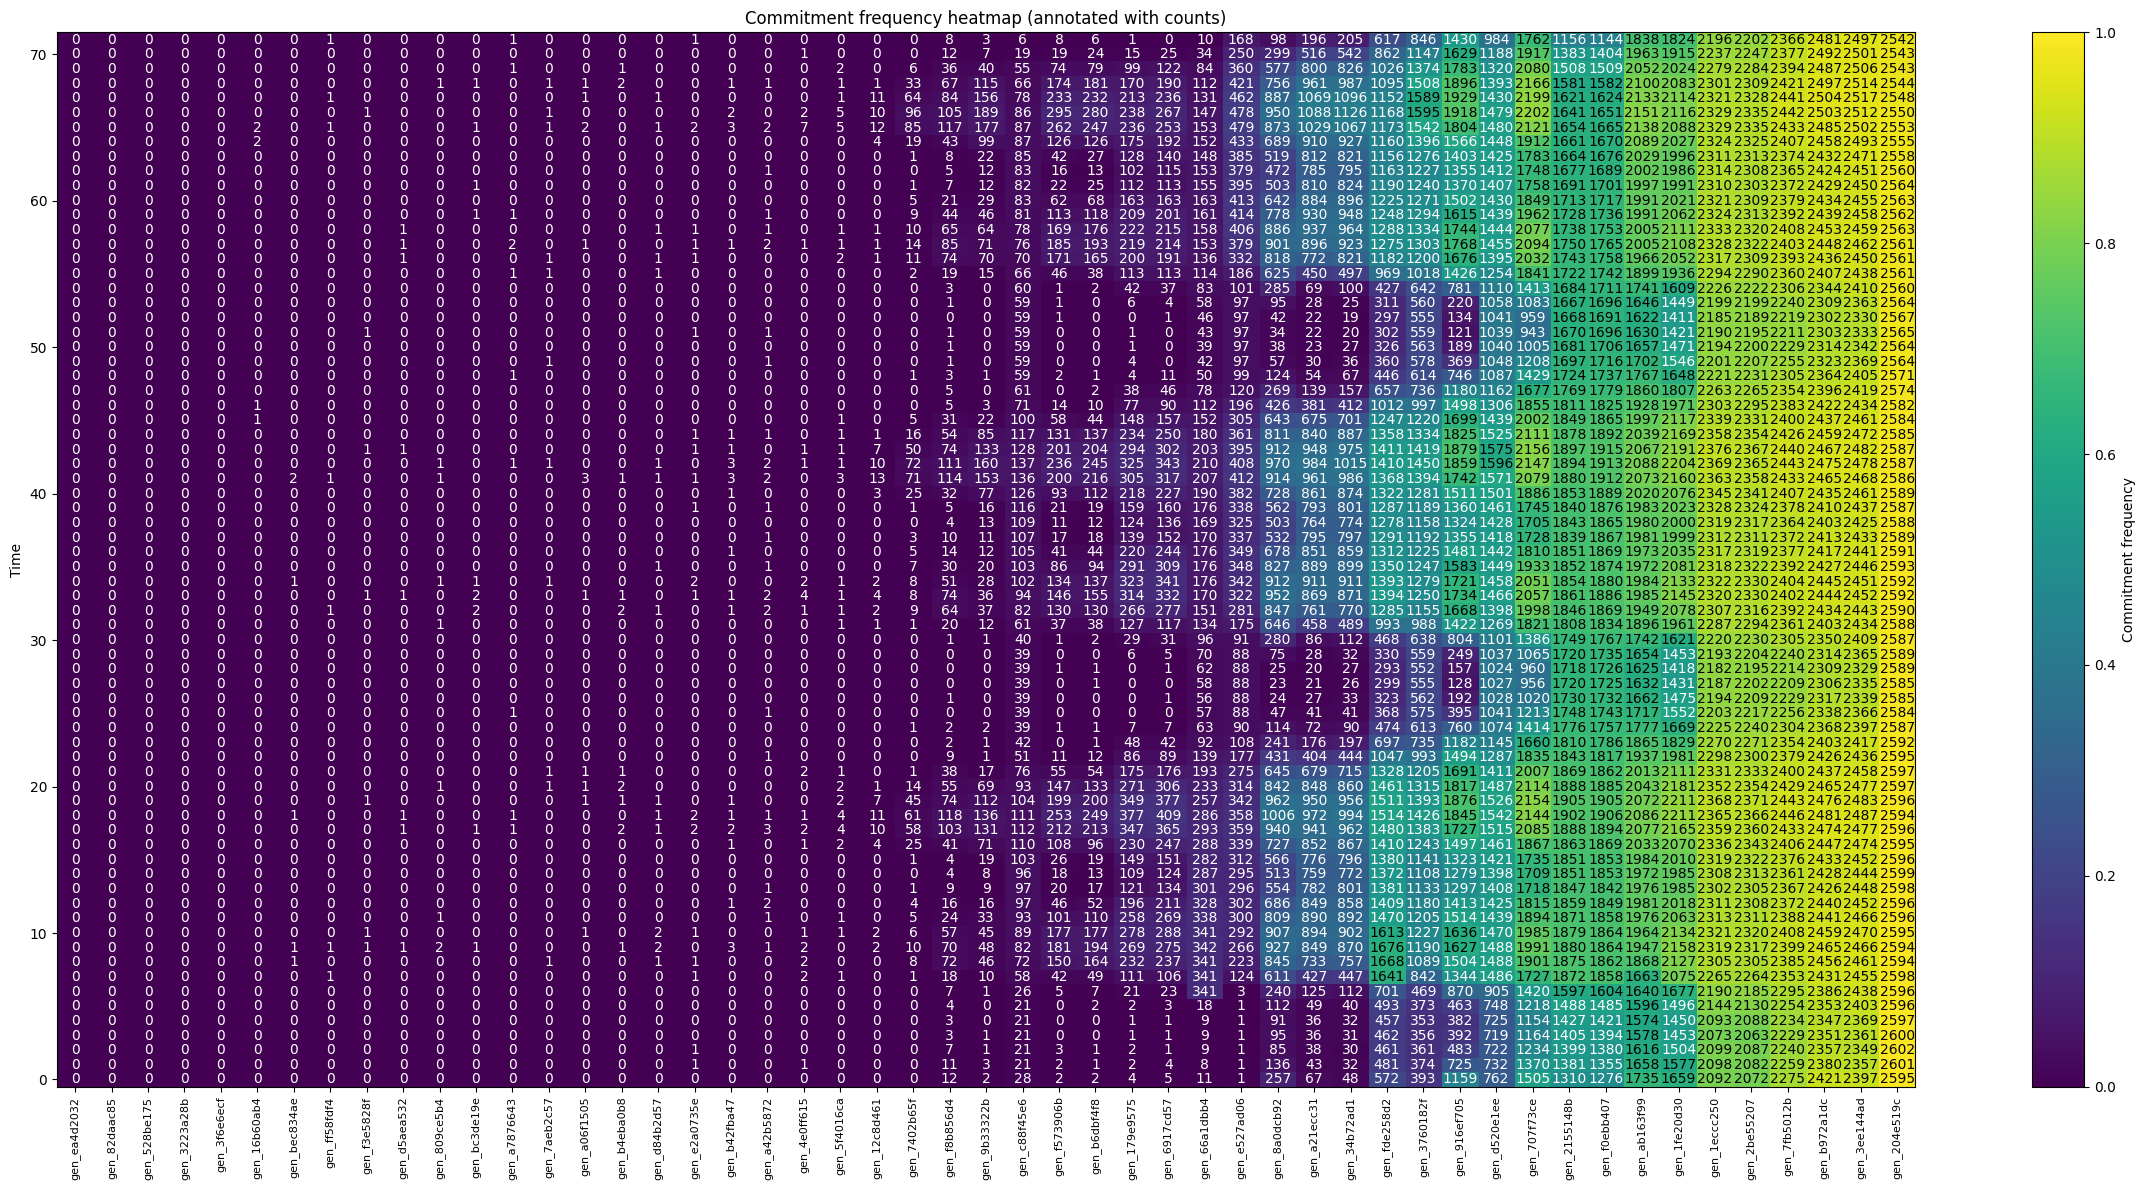

In [6]:
sorted_gens = plot_heatmap(frequencies, len(dataset))

In [7]:
full_summary = pandas.read_csv("full_summary.csv")

In [8]:
exact_matches = full_summary[["generator", "exact_match"]].sort_values(by="exact_match", ascending=False)
large_exact_matches = exact_matches[exact_matches["exact_match"] > 0.90]

In [9]:
large_exact_matches_gens = large_exact_matches["generator"].tolist()

In [10]:
len(large_exact_matches_gens)

30

In [11]:
sorted(large_exact_matches_gens)

['gen_12c8d461',
 'gen_16b60ab4',
 'gen_204e519c',
 'gen_3223a28b',
 'gen_3ee144ad',
 'gen_3f6e6ecf',
 'gen_4e0ff615',
 'gen_528be175',
 'gen_5f4016ca',
 'gen_66a1dbb4',
 'gen_7aeb2c57',
 'gen_7fb5012b',
 'gen_809ce5b4',
 'gen_82daac85',
 'gen_a06f1505',
 'gen_a42b5872',
 'gen_a7876643',
 'gen_b42fba47',
 'gen_b4eba0b8',
 'gen_b972a1dc',
 'gen_bc3de19e',
 'gen_bec834ae',
 'gen_c88f45e6',
 'gen_d5aea532',
 'gen_d84b2d57',
 'gen_e2a0735e',
 'gen_e527ad06',
 'gen_ea4d2032',
 'gen_f3e5828f',
 'gen_ff58fdf4']

In [12]:
sorted(sorted_gens[:30])

['gen_12c8d461',
 'gen_16b60ab4',
 'gen_179e9575',
 'gen_3223a28b',
 'gen_3f6e6ecf',
 'gen_4e0ff615',
 'gen_528be175',
 'gen_5f4016ca',
 'gen_7402b65f',
 'gen_7aeb2c57',
 'gen_809ce5b4',
 'gen_82daac85',
 'gen_9b33322b',
 'gen_a06f1505',
 'gen_a42b5872',
 'gen_a7876643',
 'gen_b42fba47',
 'gen_b4eba0b8',
 'gen_b6dbf4f8',
 'gen_bc3de19e',
 'gen_bec834ae',
 'gen_c88f45e6',
 'gen_d5aea532',
 'gen_d84b2d57',
 'gen_e2a0735e',
 'gen_ea4d2032',
 'gen_f3e5828f',
 'gen_f573906b',
 'gen_f8b856d4',
 'gen_ff58fdf4']

In [13]:
count = len(set(sorted(sorted_gens[:30])) & set(large_exact_matches_gens))
count

24

In [14]:
results = compute_expected_commitment_given_load(dataset, n_bins=50, max_load=8180.0, save_path="expected_commitment_given_load.pkl", reload=True)

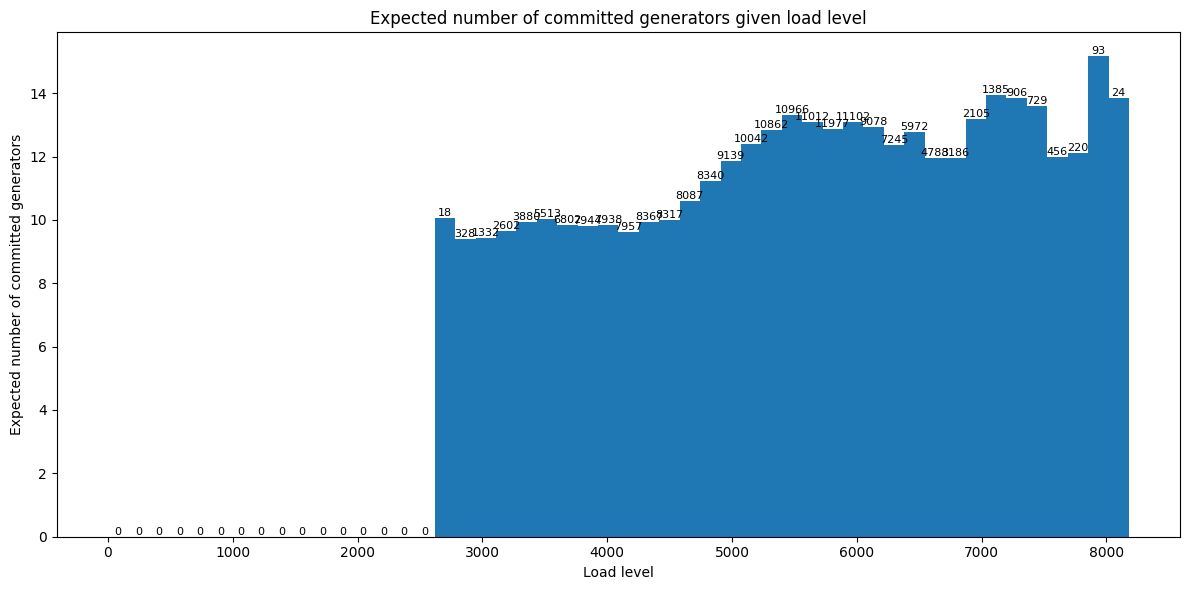

In [15]:
plot_expected_commitment_given_load(results)

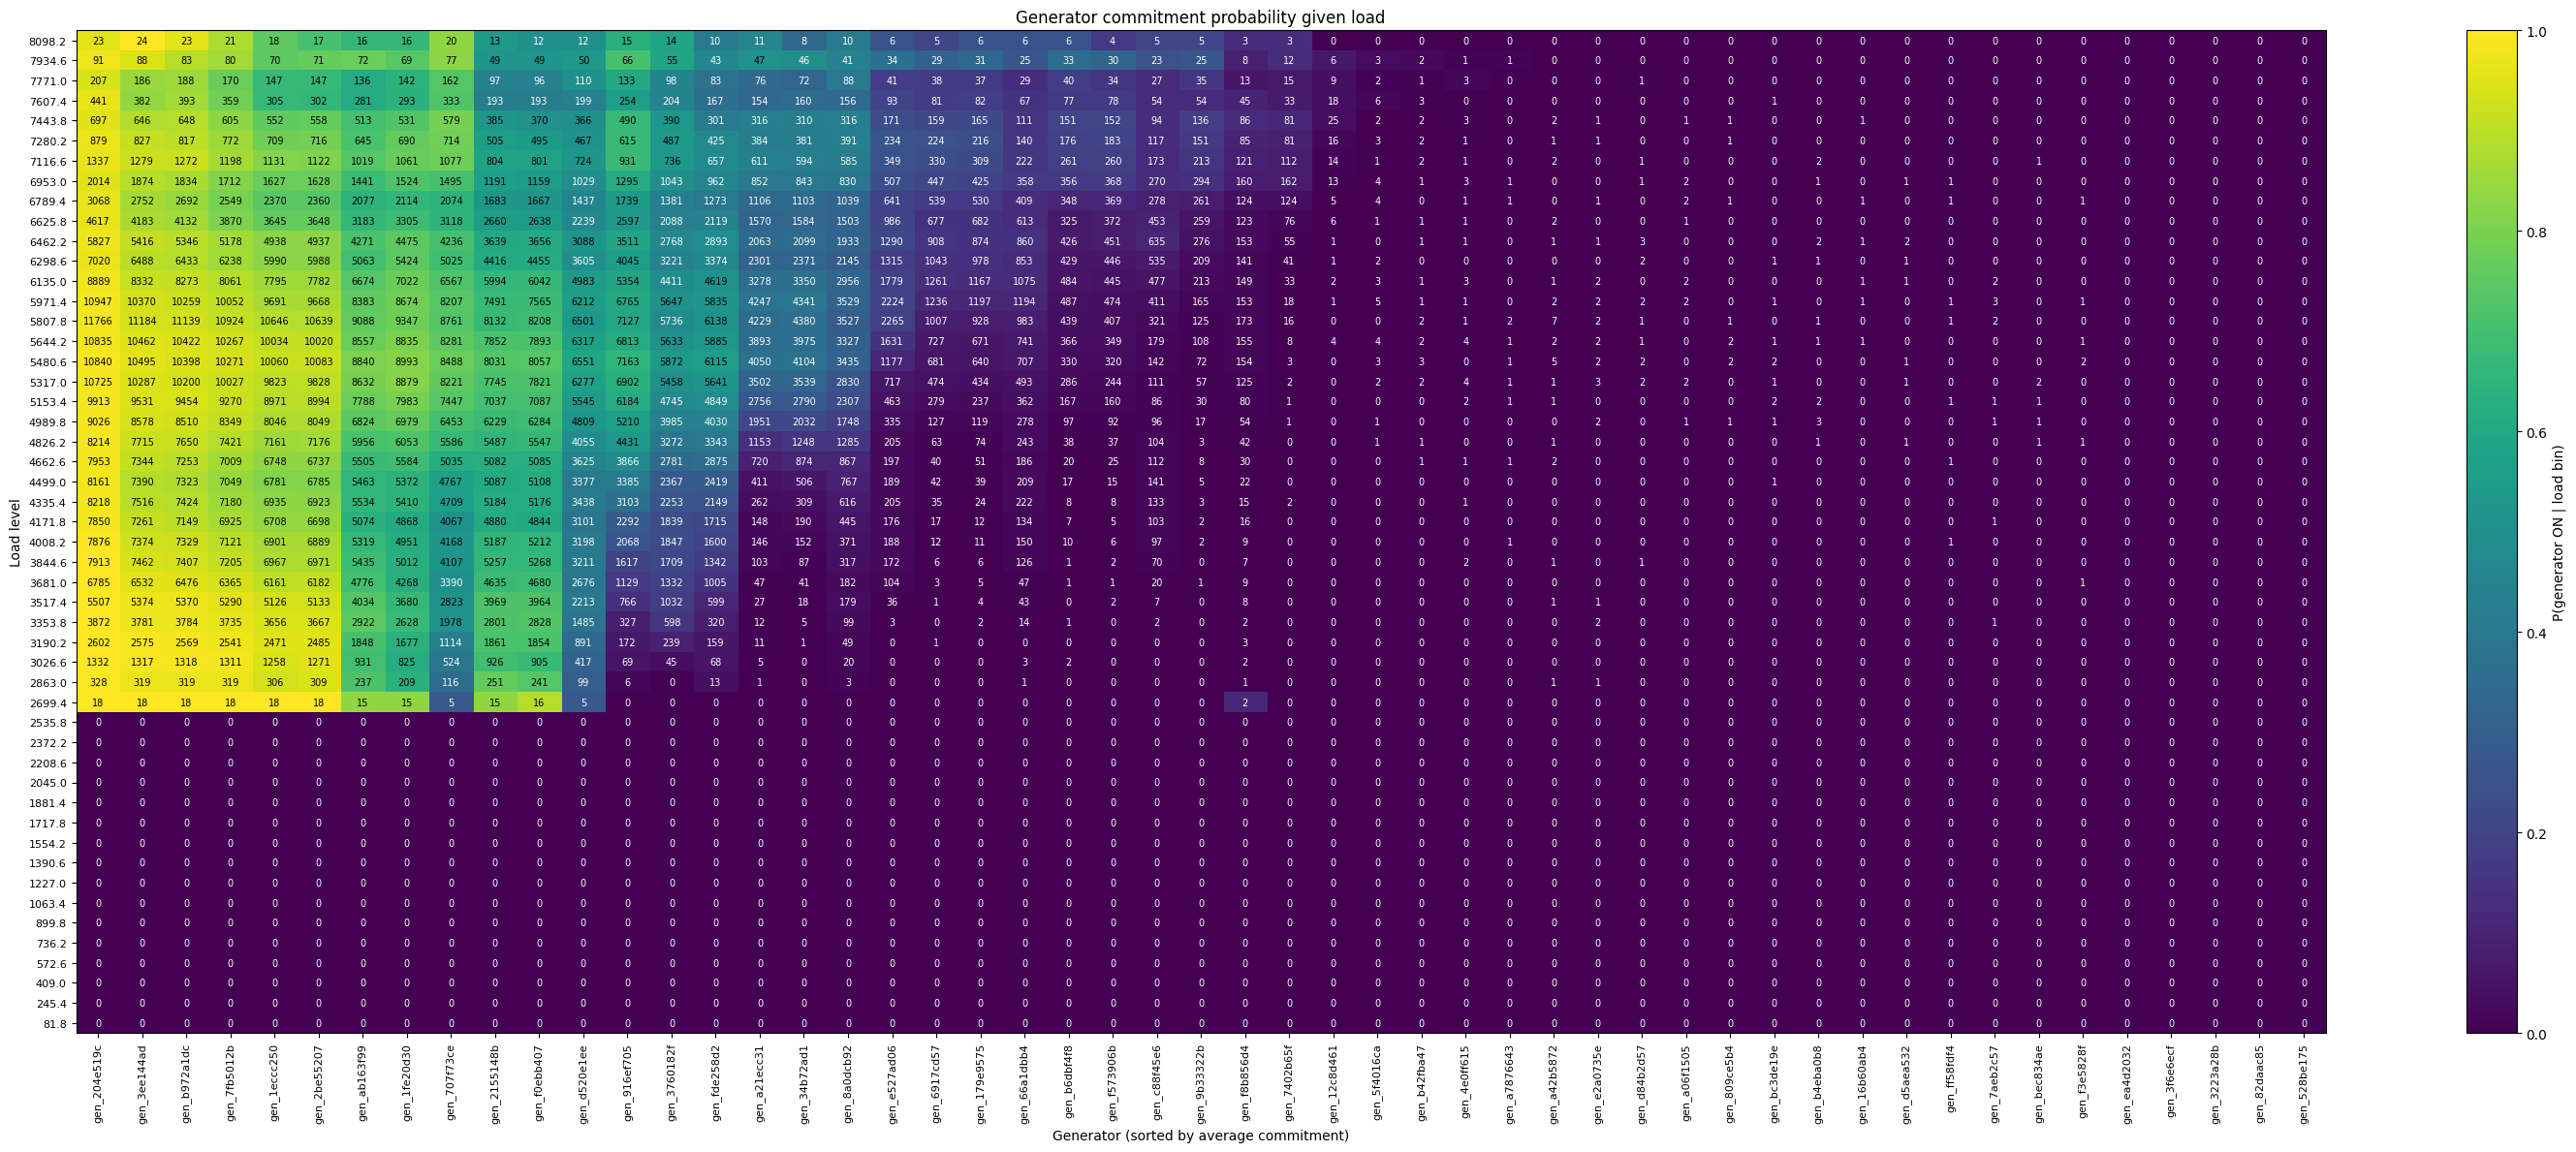

In [16]:
plot_gen_commitment_heatmap(results, gen_names=dataset[0]["gen_names"])

In [17]:
dataset[0]["features"]["profiles"].max(axis=0) # demand, wind, solar

torch.return_types.max(
values=tensor([6667.0000, 3192.8120,  138.9166]),
indices=tensor([18, 37, 13]))